# Plot loss during training
From training the VAE with the KLD loss.

In [1]:
import torch
from matplotlib import pyplot as plt
import tikzplotlib
import numpy as np

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {DEVICE} device")

Using cpu device


Function for plotting the loss. 

In [2]:
def plotLoss(num_epochs, train_loss, val_loss, KLD_scale):
    xVals = list(range(1, num_epochs + 1))

    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.suptitle(f"Accuracy and loss over {num_epochs} epochs")
    ax1.plot(xVals, train_loss[0], '.-', label="Test")
    ax1.plot(xVals, val_loss[0], '.-', label="Train")
    ax1.legend()
    ax1.set_ylabel("Reproduction loss")

    ax2.plot(xVals, train_loss[1]/KLD_scale, '.-', label="Test")
    ax2.plot(xVals, val_loss[1]/KLD_scale, '.-', label="Train")
    ax2.legend()
    ax2.set_xlabel("epochs")
    ax2.set_ylabel("KLD loss")

    plt.show()

## Scaling with the exponential function

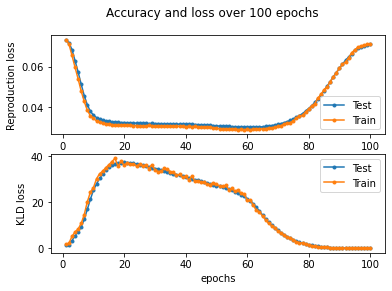

In [3]:
save_model_path ="/Users/Alex/Documents/results/plotables/VAE_losses/VAE_CIFAR100_exp.pth"

losses      = torch.load(save_model_path, map_location=torch.device(DEVICE))
num_epochs  = losses['train_loss'].shape[1]
train_loss  = losses['train_loss']
val_loss    = losses['val_loss']

xVals = list(range(1, num_epochs + 1))
KLD_scale = np.exp((np.array(range(num_epochs)) - len(xVals))/4)

plotLoss(num_epochs, train_loss, val_loss, KLD_scale)

# Beta KLDscale loss

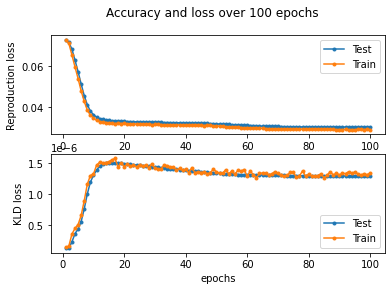

In [4]:
save_model_path ="/Users/Alex/Documents/results/plotables/VAE_losses/VAE_beta_CIFAR100.pth"

losses      = torch.load(save_model_path, map_location=torch.device(DEVICE))
num_epochs  = losses['train_loss'].shape[1]
train_loss  = losses['train_loss']
val_loss    = losses['val_loss']

KLD_scale = 5/32*3*32*32

plotLoss(num_epochs, train_loss, val_loss, KLD_scale)


## Linear KLDscale loss

<ipython-input-2-707aa4fe2e20>:11: RuntimeWarning: divide by zero encountered in true_divide
  ax2.plot(xVals, train_loss[1]/KLD_scale, '.-', label="Test")
<ipython-input-2-707aa4fe2e20>:12: RuntimeWarning: divide by zero encountered in true_divide
  ax2.plot(xVals, val_loss[1]/KLD_scale, '.-', label="Train")


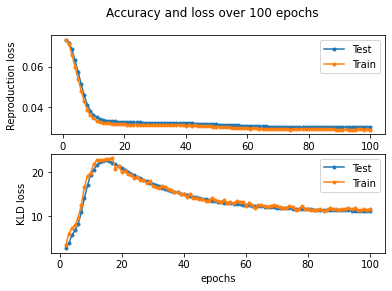

In [8]:
save_model_path ="/Users/Alex/Documents/results/plotables/VAE_losses/VAE_CIFAR100_lin.pth"

losses      = torch.load(save_model_path, map_location=torch.device(DEVICE))
num_epochs  = losses['train_loss'].shape[1]
train_loss  = losses['train_loss']
val_loss    = losses['val_loss']

KLD_scale = np.array(range(num_epochs))/np.power(num_epochs,3)

plotLoss(num_epochs, train_loss, val_loss, KLD_scale)


### Still linear scaling but with vgg16

<ipython-input-2-707aa4fe2e20>:11: RuntimeWarning: divide by zero encountered in true_divide
  ax2.plot(xVals, train_loss[1]/KLD_scale, '.-', label="Test")
<ipython-input-2-707aa4fe2e20>:12: RuntimeWarning: divide by zero encountered in true_divide
  ax2.plot(xVals, val_loss[1]/KLD_scale, '.-', label="Train")


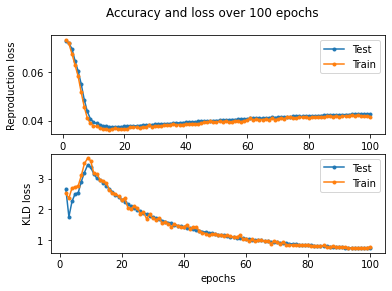

In [9]:
save_model_path ="/Users/Alex/Documents/results/plotables/VAE_losses/VAE_CIFAR100_linVGG16.pth"

losses      = torch.load(save_model_path, map_location=torch.device(DEVICE))
num_epochs  = losses['train_loss'].shape[1]
train_loss  = losses['train_loss']
val_loss    = losses['val_loss']

KLD_scale = np.array(range(num_epochs))/np.power(num_epochs,2)

plotLoss(num_epochs, train_loss, val_loss, KLD_scale)
